In [122]:
import pandas as pd
from google.colab import drive # get the access from google drive
drive.mount('/content/drive/')
test = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/test.csv',encoding= 'unicode_escape')
train=pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/train.csv', encoding= 'unicode_escape')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


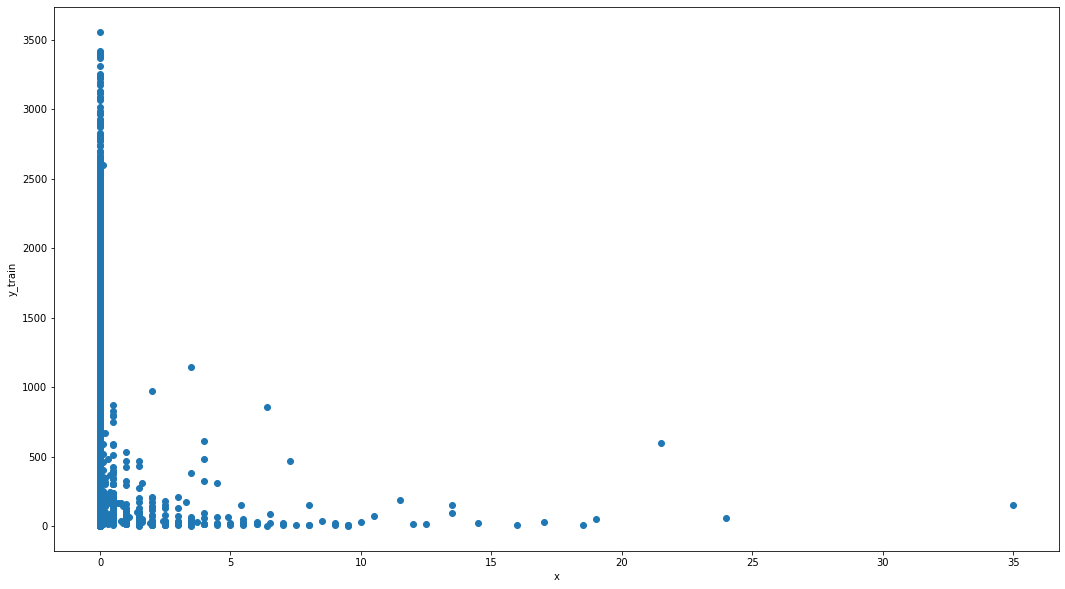

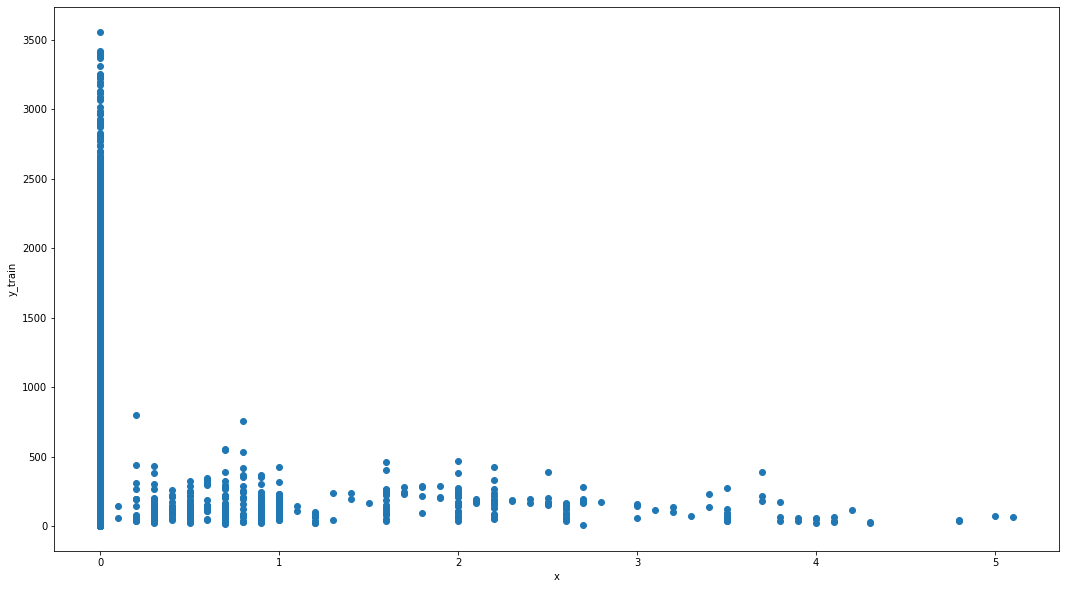

0.12573223304561404
    Hour  Solar Radiation (MJ/m2)  Humidity(%)  Spring  Summer  \
0      0                     0.00           37     0.0     0.0   
1      1                     0.00           38     0.0     0.0   
2      2                     0.00           39     0.0     0.0   
3      3                     0.00           40     0.0     0.0   
4      4                     0.00           36     0.0     0.0   
5      5                     0.00           37     0.0     0.0   
6      6                     0.00           35     0.0     0.0   
7      7                     0.00           38     0.0     0.0   
8      8                     0.01           37     0.0     0.0   
9      9                     0.23           27     0.0     0.0   
10    10                     0.65           24     0.0     0.0   
11    11                     0.94           21     0.0     0.0   
12    12                     1.11           23     0.0     0.0   
13    13                     1.16           25     0.0  

In [123]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
def pre_proc_train():
    data = train

  #Rename columns with spaces (remove spces)
    data.rename(columns = {'Rented Bike Count':'Rented_Bike_Count','Functioning Day':'Functioning_Day'}, inplace = True)
    y_train=data.iloc[:,1:2]
  # print(X_train)
# Scatter plot
    fig, ax = plt.subplots(figsize = (18,10))
    ax.scatter(data['Rainfall(mm)'], y_train)
    ax.set_xlabel('x')
    ax.set_ylabel('y_train')
    #plt.show()
    median = data.loc[data['Rainfall(mm)']>10, 'Rainfall(mm)'].median()
    data["Rainfall(mm)"] = np.where(data["Rainfall(mm)"] >10, median,data['Rainfall(mm)'])
    data["Rainfall(mm)"].shape
    ########
    fig, ax = plt.subplots(figsize = (18,10))
    ax.scatter(data['Snowfall (cm)'], y_train)
    ax.set_xlabel('x')
    ax.set_ylabel('y_train')
    plt.show()
    median = data.loc[data['Snowfall (cm)']<0.4, 'Snowfall (cm)'].median()
    data["Snowfall (cm)"] = np.where(data["Snowfall (cm)"] >0.4, median,data['Snowfall (cm)'])
    data["Snowfall (cm)"].shape
# Lower bound             
    data[["day", "month", "year"]] = data["Date"].str.split("/", expand = True)

    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(data[['Seasons']]).toarray())
    encoder_df.columns = [ 'Spring','Summer','Winter']
    data = data.join(encoder_df)
    
    data['Functioning_Day'] = data['Functioning_Day'].map({'Yes': 1, 'No': 0})
    data['Holiday'] = data['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
    # data['Seasons'] = data['Seasons'].map({'Winter': 0, 'Spring': 1,'Summer': 2,'Autumn': 3})

    # c=['Snowfall (cm)','Functioning_Day','Dew point temperature(Â°C)','Hour','Solar Radiation (MJ/m2)','Rainfall(mm)','Seasons','Temperature(Â°C)' ,'Humidity(%)','Wind speed (m/s)','Visibility (10m)','Holiday']
    # correMtr=data[c].corr()
    # mask=np.array(correMtr)
    # mask[np.tril_indices_from(mask)]=False
    # #Heat map for correlation matrix of attributes
    # fig,ax=plt.subplots(figsize=(15,12))
    # sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
    # ax.set_title('Correlation matrix of attributes')
    # plt.show()
    data= data.drop(['Dew point temperature(Â°C)','Date','Seasons'], axis=1)
    correMtr=data['Wind speed (m/s)'].corr(data['Rented_Bike_Count'])
    print(correMtr)




    needed = ['Hour','Solar Radiation (MJ/m2)','Humidity(%)','Spring','Summer','Functioning_Day','Temperature(Â°C)',"day", "month", "year"]
    cols_to_norm = [ 'Wind speed (m/s)','Visibility (10m)','Rainfall(mm)','Snowfall (cm)']
    ####################################################################### // StandardScaler  
    #######################################################################
    data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
    #######################################################################
    #######################################################################
    
    d=pd.concat([data[needed],data[cols_to_norm]],axis=1)

    return d,y_train

x_train,y_train=pre_proc_train()
print(x_train.head(20))

Text(0, 0.5, 'y_train')

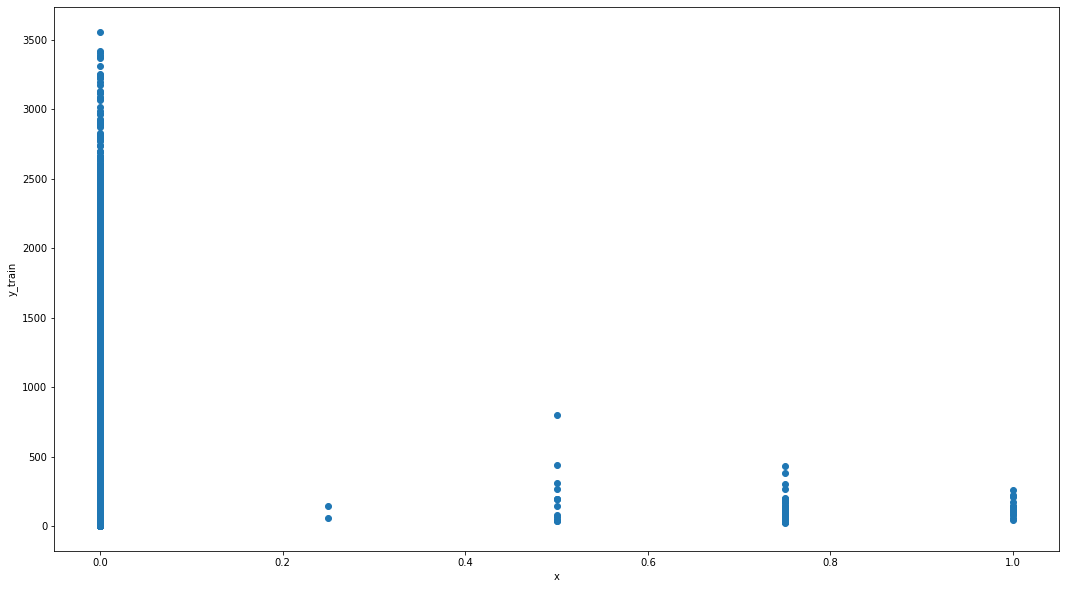

In [124]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(x_train['Snowfall (cm)'], y_train)
ax.set_xlabel('x')
ax.set_ylabel('y_train')

In [125]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

def pre_proc_tsst():
    data =test
    ID=data.iloc[:,0:1]
  
   #Rename columns with spaces (remove spces)
    data.rename(columns = {'Rented Bike Count':'Rented_Bike_Count','Functioning Day':'Functioning_Day'}, inplace = True)
    X_test=data.iloc[:,0:1]
    # print(X_train)
    data[["day", "month", "year"]] = data["Date"].str.split("/", expand = True)
    
      
    data['Functioning_Day'] = data['Functioning_Day'].map({'Yes': 1, 'No': 0})
    data['Holiday'] = data['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
    # data['Seasons'] = data['Seasons'].map({'Winter': 0, 'Spring': 1,'Summer': 2,'Autumn': 3})


    # c=['Snowfall (cm)','Functioning_Day','Dew point temperature(Â°C)','Hour','Solar Radiation (MJ/m2)','Rainfall(mm)','Seasons','Temperature(Â°C)',"day", "month", "year" ,'Humidity(%)','Wind speed (m/s)','Visibility (10m)']
    # correMtr=data[c].corr()
    # mask=np.array(correMtr)
    # mask[np.tril_indices_from(mask)]=False
    # #Heat map for correlation matrix of attributes
    # fig,ax=plt.subplots(figsize=(15,12))
    # sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
    # ax.set_title('Correlation matrix of attributes')
    # plt.show()
  
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(data[['Seasons']]).toarray())
    encoder_df.columns = [ 'Autumn','Summer']
    data = data.join(encoder_df)
    

    data= data.drop(['Dew point temperature(Â°C)','Date','Seasons'], axis=1)

        
  
    needed = ['Hour','Solar Radiation (MJ/m2)','Humidity(%)','Autumn','Summer','Functioning_Day','Temperature(Â°C)',"day", "month", "year"]
    cols_to_norm = [ 'Wind speed (m/s)','Visibility (10m)','Rainfall(mm)','Snowfall (cm)']

    data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
    
    d=pd.concat([data[needed],data[cols_to_norm]],axis=1)
    return  d ,ID
X_test,ID=pre_proc_tsst()    
print(X_test)

      Hour  Solar Radiation (MJ/m2)  Humidity(%)  Autumn  Summer  \
0        0                      0.0           77     0.0     1.0   
1        1                      0.0           80     0.0     1.0   
2        2                      0.0           84     0.0     1.0   
3        3                      0.0           84     0.0     1.0   
4        4                      0.0           85     0.0     1.0   
...    ...                      ...          ...     ...     ...   
2755    19                      0.0           34     1.0     0.0   
2756    20                      0.0           37     1.0     0.0   
2757    21                      0.0           39     1.0     0.0   
2758    22                      0.0           41     1.0     0.0   
2759    23                      0.0           43     1.0     0.0   

      Functioning_Day  Temperature(Â°C) day month  year  Wind speed (m/s)  \
0                   1              29.1   8     8  2018          0.304348   
1                   1        

In [126]:
# # ##############################################################################################
# # #REPLACE IN TRAIN
# # ##############################################################################################
# col_mean =x_train.mean(axis=0)

# col_1=col_mean[2]
# col_2=col_mean[3]
# x_train["Solar Radiation (MJ/m2)"]=x_train["Solar Radiation (MJ/m2)"].replace(0,np.nan)
# x_train["Rainfall(mm)"]=x_train["Rainfall(mm)"].replace(0,np.nan)


# data_mean_train=x_train.fillna({"Solar Radiation (MJ/m2)":col_1,"Rainfall(mm)":col_2})
# # ##############################################################################################
# # #REPLACE IN TEST
# # ##############################################################################################
# col_mean_tst =X_test.mean(axis=0)

# col_1_tst=col_mean_tst[2]
# col_2_tst=col_mean_tst[3]
# X_test["Solar Radiation (MJ/m2)"]=X_test["Solar Radiation (MJ/m2)"].replace(0,np.nan)
# X_test["Rainfall(mm)"]=X_test["Rainfall(mm)"].replace(0,np.nan)


# data_mean_tst=X_test.fillna({"Solar Radiation (MJ/m2)":col_1_tst,"Rainfall(mm)":col_2_tst})


In [127]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.kernel_ridge import KernelRidge
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    # print('MAE:', mae)
    # print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('________________________________')
X=x_train
y=y_train
x_split_train, X_split_test, y_split_train, y_split_test = train_test_split(X, y, random_state=1)


models = [
        ('dummy-mean', DummyRegressor(strategy='mean')),
        ('dummy-median', DummyRegressor(strategy='median')),
        ('random-forest', RandomForestRegressor(random_state=0)),
         ]
results = []

for name, model in models:
    model.fit(x_train, y_train)# fitting the training data to model
    y_pred = model.predict(X_test)
    y = model.predict(X_split_test)
    train_pred = model.predict(x_split_train)

    print('Test set evaluation:\n_____________________________________')
    print_evaluate(y_split_test, y)
    print('====================================')
    print('Train set evaluation:\n_____________________________________')
    print_evaluate(y_split_train, train_pred)    
    from sklearn import metrics

    

# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
# KRR.fit(x_train,y_train)
# y_pred=KRR.predict(X_test)

# KRR = Ridge(alpha=0.6)
# KRR.fit(x_train,y_train)
# y_pred=KRR.predict(X_test)


# lr_model=linear_model.LinearRegression()

# lr_model.fit(x_train,y_train)
# lr=lr_model.score(x_train,y_train)
# print('Accuracy of the model :',lr)
# print('Model coefficients :',lr_model.coef_)
# print('Model intercept value :',lr_model.intercept_)
# predict=cross_val_predict(lr_model,x_train,y_train,cv=3)
# #Cross validation plot
# fig,ax=plt.subplots(figsize=(15,8))
# ax.scatter(y_train,y_train-predict)
# ax.axhline(lw=2,color='black')
# ax.set_title('Cross validation prediction plot')
# ax.set_xlabel('Observed')
# ax.set_ylabel('Residual')
# outliers
#score :355.34883

Test set evaluation:
_____________________________________
RMSE: 627.9943230134639
R2 Square -1.4320136447754095e-06
________________________________
Train set evaluation:
_____________________________________
RMSE: 641.2799637277735
R2 Square -1.5258793117922664e-07
________________________________
Test set evaluation:
_____________________________________
RMSE: 679.4901524918027
R2 Square -0.17072669300206633
________________________________
Train set evaluation:
_____________________________________
RMSE: 691.4126805959585
R2 Square -0.16246371285502503
________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Autumn
Feature names seen at fit time, yet now missing:
- Spring

  warnings.warn(message, FutureWarning)


Test set evaluation:
_____________________________________
RMSE: 79.10829296139985
R2 Square 0.9841315973191989
________________________________
Train set evaluation:
_____________________________________
RMSE: 76.95232507078653
R2 Square 0.9856004733140822
________________________________


In [128]:
import csv
# headers=["ID","Rented Bike Count"]
counter=0
outputs=[]
# for i in range(0,len(ID)):
#   outputs.append(ID[i],y_test[i])
with open ('Outliers__rainfall_snowfall_.4.csv','w',newline='')as csvfile:
    fieldnames=["ID","Rented Bike Count"]
    thewriter=csv.DictWriter(csvfile,fieldnames=fieldnames)
    thewriter.writeheader()
    print(len(ID))
    for id in y_pred:
    
        u=int(id)
        thewriter.writerow({"ID":counter,"Rented Bike Count": u})
        counter+=1
  # for i in range(0,len(ID)):
    # thewriter.writerow({"ID": ID[i],"Rented Bike Count":y_test[i]}


2760
